### This is a solution to the Riddler Classic from five-thirty-eight (Mar 27, 2020)
You start with a fair 6-sided die and roll it six times, recording the results of each roll. You then write these numbers on the six faces of another, unlabeled fair die. For example, if your six rolls were 3, 5, 3, 6, 1 and 2, then your second die wouldn’t have a 4 on it; instead, it would have two 3s.

Next, you roll this second die six times. You take those six numbers and write them on the faces of yet another fair die, and you continue this process of generating a new die from the previous one.

Eventually, you’ll have a die with the same number on all six faces. What is the average number of rolls it will take to reach this state?

Extra credit: Instead of a standard 6-sided die, suppose you have an N-sided die, whose sides are numbered from 1 to N. What is the average number of rolls it would take until all N sides show the same number?

https://fivethirtyeight.com/features/can-you-get-the-gloves-out-of-the-box/

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def die_game(no_of_sides, sims=1):
    
    # initialise list that will contain total number of rounds needed to meet required condition
    total_rounds = []
    # run for loop for required number of simulations
    for sim in range(sims):         
        # initialise a die and the no of rounds to zero
        die_values = list(range(1, (no_of_sides + 1)))
        no_of_rounds = 0        
        # then start a while loop that breaks when final the condition met
        while True:
            roll_results = []
            for x in range(no_of_sides):
                roll = np.random.choice(die_values)
                roll_results.append(roll)
            die_values = roll_results
            no_of_rounds += 1
            if all(elem == die_values[0] for elem in die_values):
                total_rounds.append(no_of_rounds)
                break
    return total_rounds

In [ ]:
# run the simulation for a six sides die, with 100k simulations
total_rounds = die_game(6, 100000)
print(np.mean(total_rounds))

106


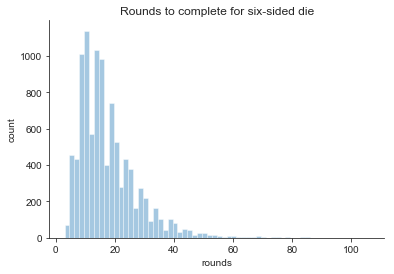

In [7]:
print(np.max(total_rounds))
# plot the results of the above simulation
sns.set_style('ticks')
sns.distplot(total_rounds, bins = 62, kde = False)
sns.despine(top = True, right = True)
plt.xlabel("rounds")
plt.ylabel("count")
plt.title("Rounds to complete for six-sided die")
plt.show()

In [5]:
# run the simulation for dies having between two and ten sides to see what the results look like
sides = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for x in sides:
    total_rounds = die_game(x, 10000)
    print("The average number of rounds to finish with a " + str(x) + " sided die is " + str(np.mean(total_rounds)) + "\n")

The average number of rounds to finish with a 2 sided die is 1.9794

The average number of rounds to finish with a 3 sided die is 3.8156

The average number of rounds to finish with a 4 sided die is 5.774

The average number of rounds to finish with a 5 sided die is 7.7078

The average number of rounds to finish with a 6 sided die is 9.6745

The average number of rounds to finish with a 7 sided die is 11.5672

The average number of rounds to finish with a 8 sided die is 13.6198

The average number of rounds to finish with a 9 sided die is 15.589

The average number of rounds to finish with a 10 sided die is 17.5576

